In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")


In [18]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [19]:
df.shape

(18249, 14)

In [20]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [21]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [22]:
# Split Date into 3 different columns

df['Year'], df['Month'],  df['Day'] = df['Date'].str.split('-').str

<ipython-input-22-8dcfa8e57f17>:3: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



Data Visualization

Organic vs Conventional

 The main difference between organic and conventional food products are the chemicals involved during production and processing. 
 
 The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging

In [23]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

 2% of our dataset is organic.
  Look at the average price distribution

/Users/dr.k.rajaravichand/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='AveragePrice'>

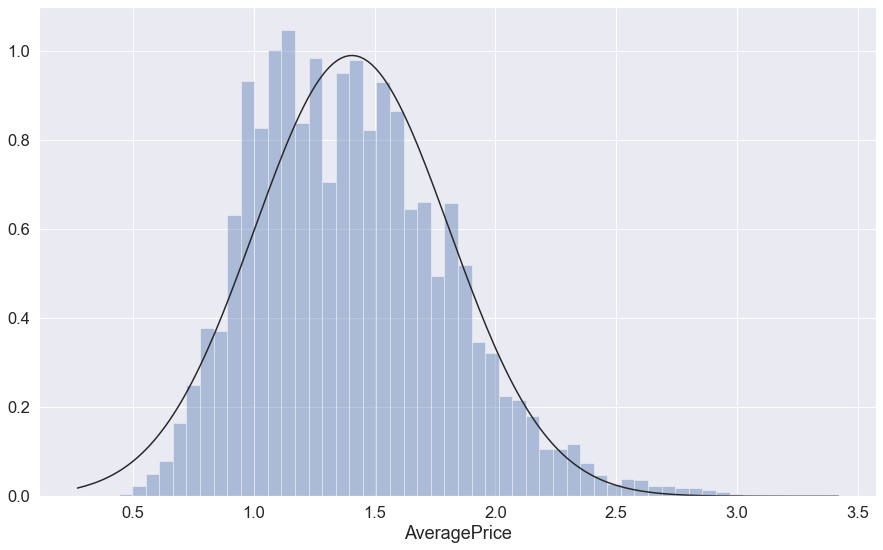

In [24]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

price of conventional vs. organic.

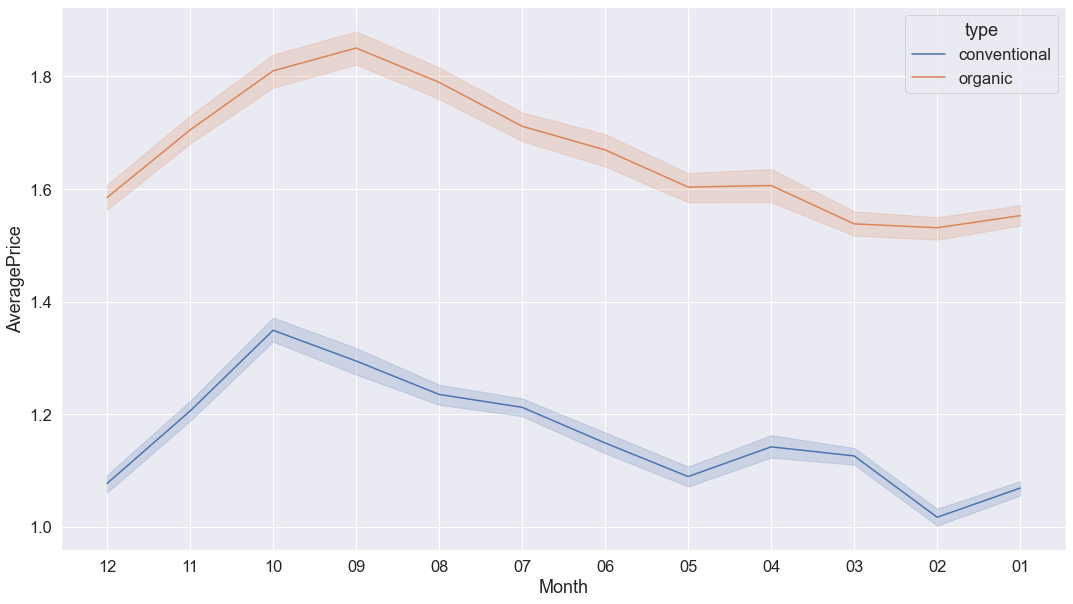

In [25]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

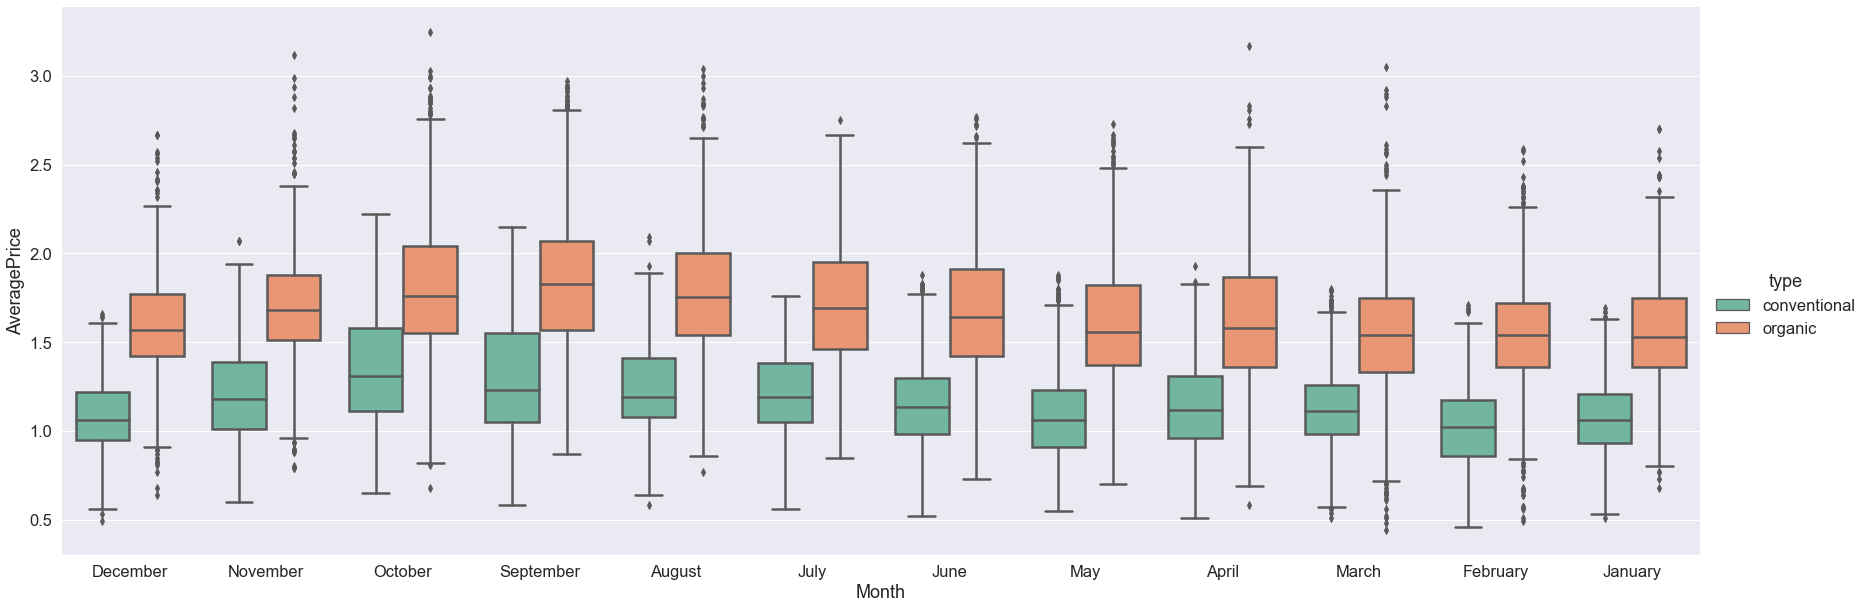

In [26]:
df['Month'] = df['Month'].replace({'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', 
                                   '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', 
                                   '11': 'November', '12': 'December'})


ax = sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8.5, linewidth=2.5, aspect=2.8,palette="Set2");

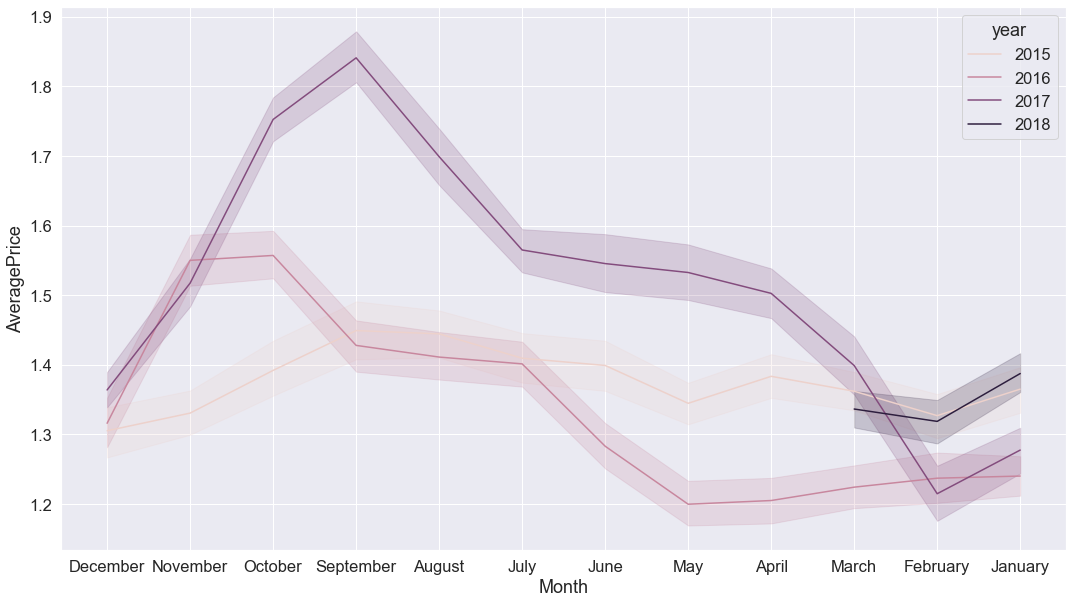

In [27]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='year',  data=df)
plt.show()

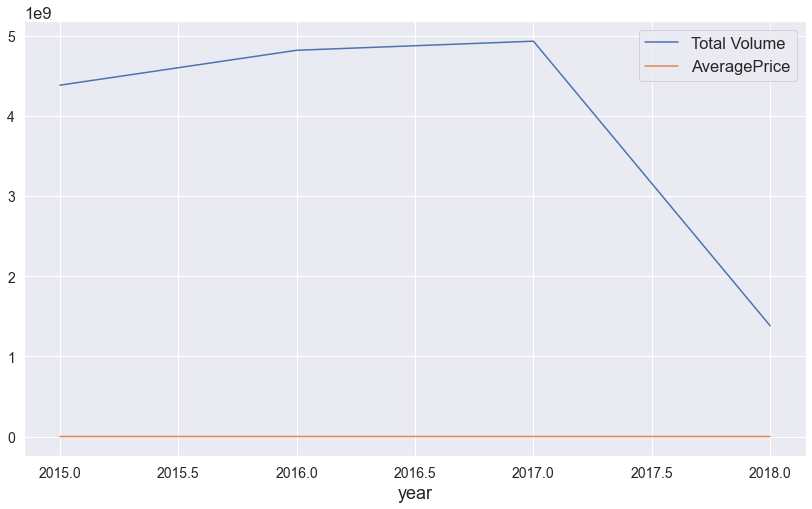

In [28]:
Year = df[['Total Volume' ,'AveragePrice']].groupby(df.year).sum()
Year.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

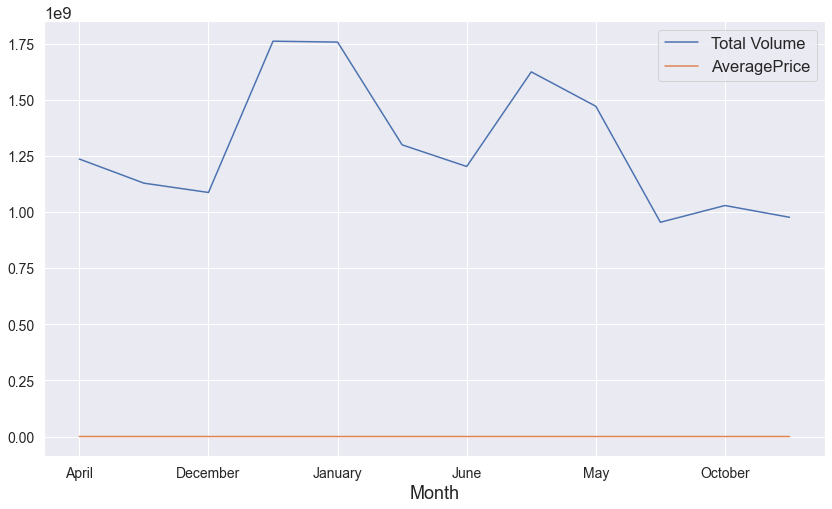

In [29]:
Month = df[['Total Volume', 'AveragePrice']].groupby(df.Month).sum()
Month.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

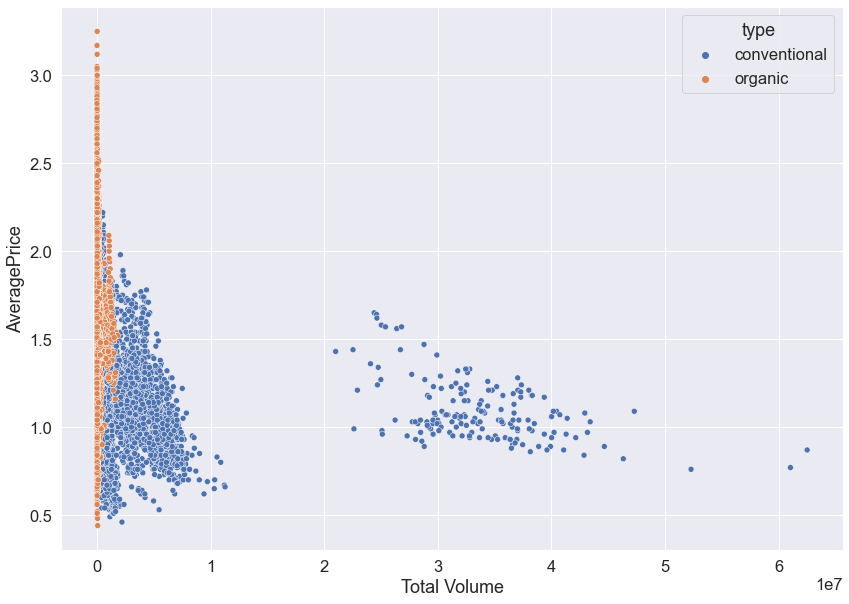

In [30]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= df)

<AxesSubplot:xlabel='Month'>

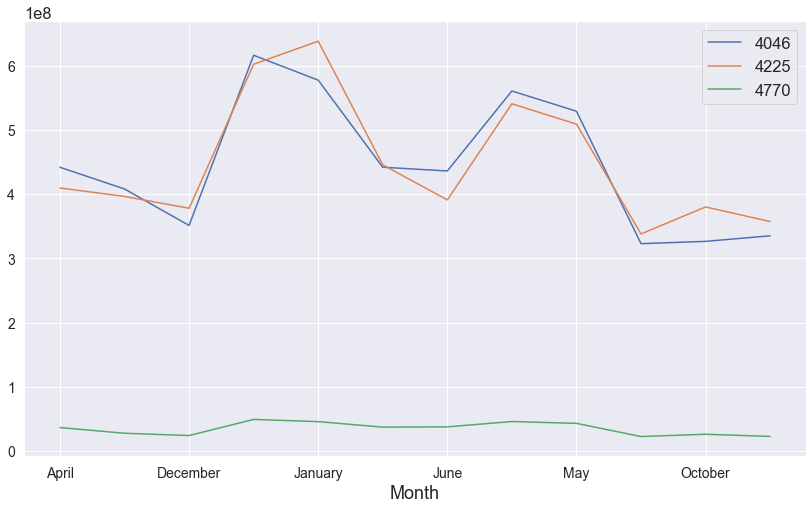

In [31]:
variant = df[['4046', '4225', '4770']].groupby(df.Month).sum()
variant.plot(kind='line', fontsize = 14, figsize=(14,8))

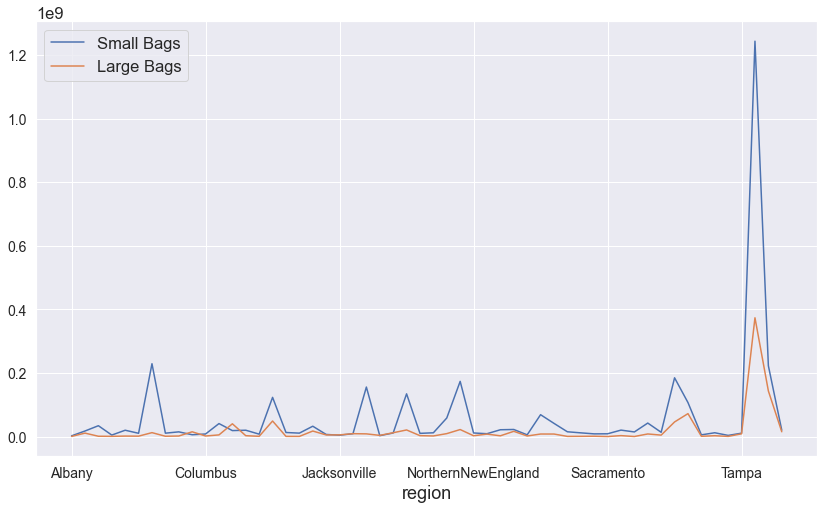

In [32]:
Bags = df[['Small Bags', 'Large Bags']].groupby(df.region).sum()
Bags.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

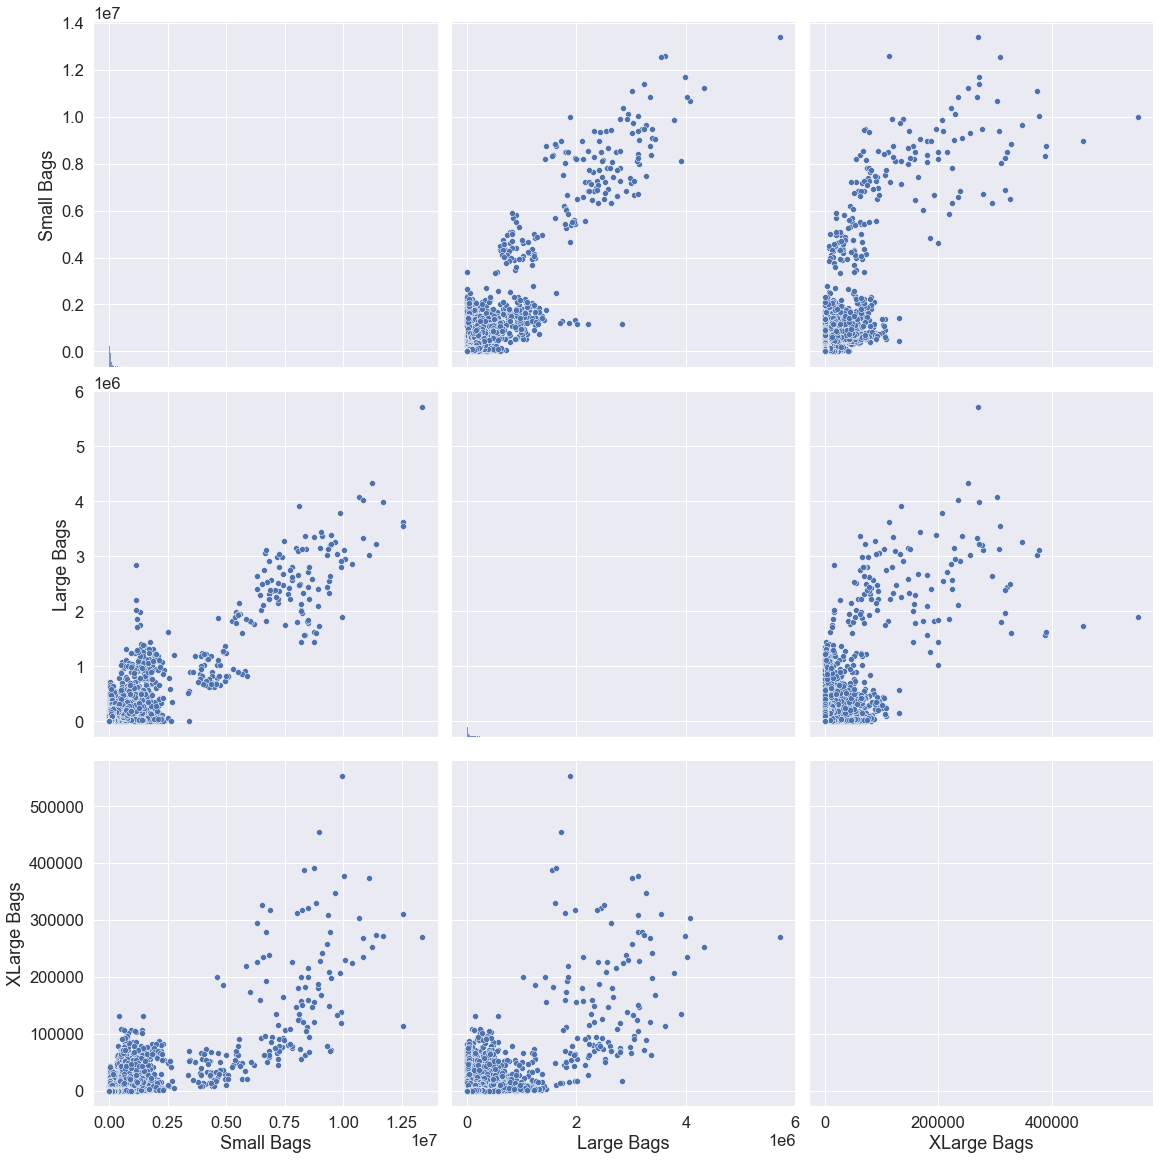

In [33]:
sns.pairplot(df.iloc[:,8:11], palette="husl",height=5.5)

In [34]:
con=df[df['type']=='conventional'].groupby('year')['Total Volume'].agg('mean')
org=df[df['type']=='organic'].groupby('year')['Total Volume'].agg('mean')

trace1=go.Bar(x=con.index,y=con,name="Conventional",
             marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

trace2=go.Bar(x=con.index,y=org,name="Organic",
             marker=dict(
        color='red',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

data=[trace1,trace2]

layout=go.Layout(barmode="stack",title="Organic vs. Conventional (Mean Volume)",
                yaxis=dict(title="Volume"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [35]:
df.groupby(['region','year'],as_index=False)['Total Volume'].agg('mean')

,region,year,Total Volume
0,Albany,2015,3.874900e+04
1,Albany,2016,5.061861e+04
2,Albany,2017,4.935455e+04
3,Albany,2018,6.424942e+04
4,Atlanta,2015,2.233817e+05
...,...,...,...
211,West,2018,3.853212e+06
212,WestTexNewMexico,2015,4.031456e+05
213,WestTexNewMexico,2016,4.212253e+05
214,WestTexNewMexico,2017,4.556691e+05


Text(0.5, 1.0, 'Average Price of Avocado According to Region')

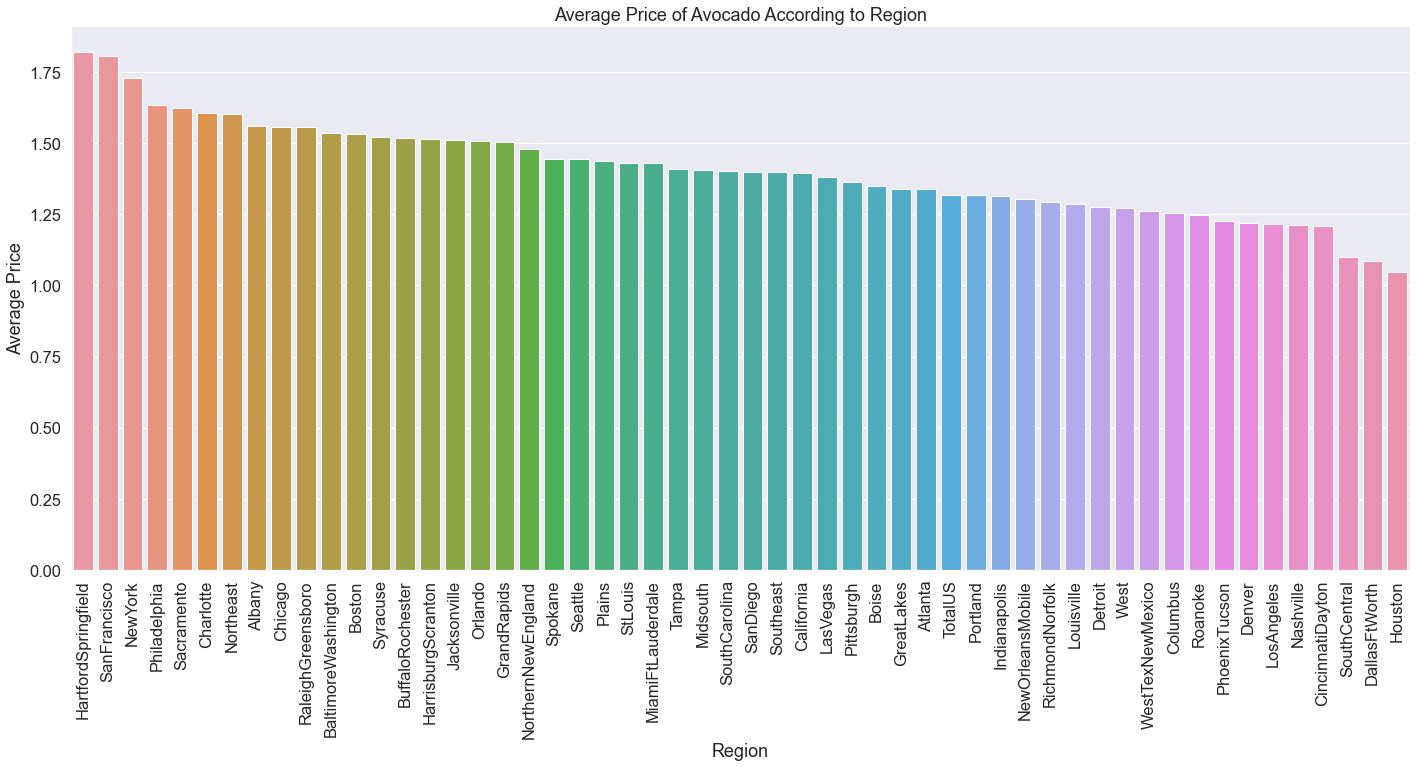

In [36]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

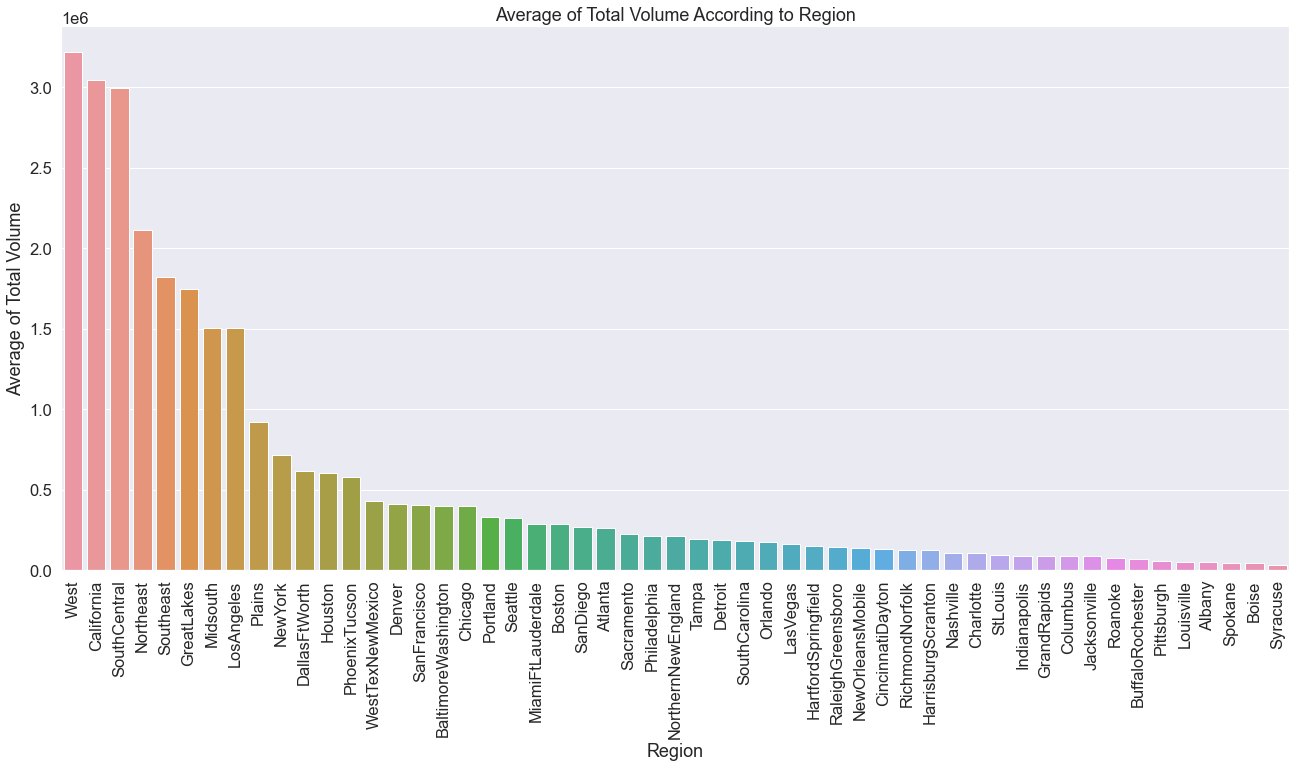

In [37]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

/Users/dr.k.rajaravichand/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/dr.k.rajaravichand/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/dr.k.rajaravichand/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



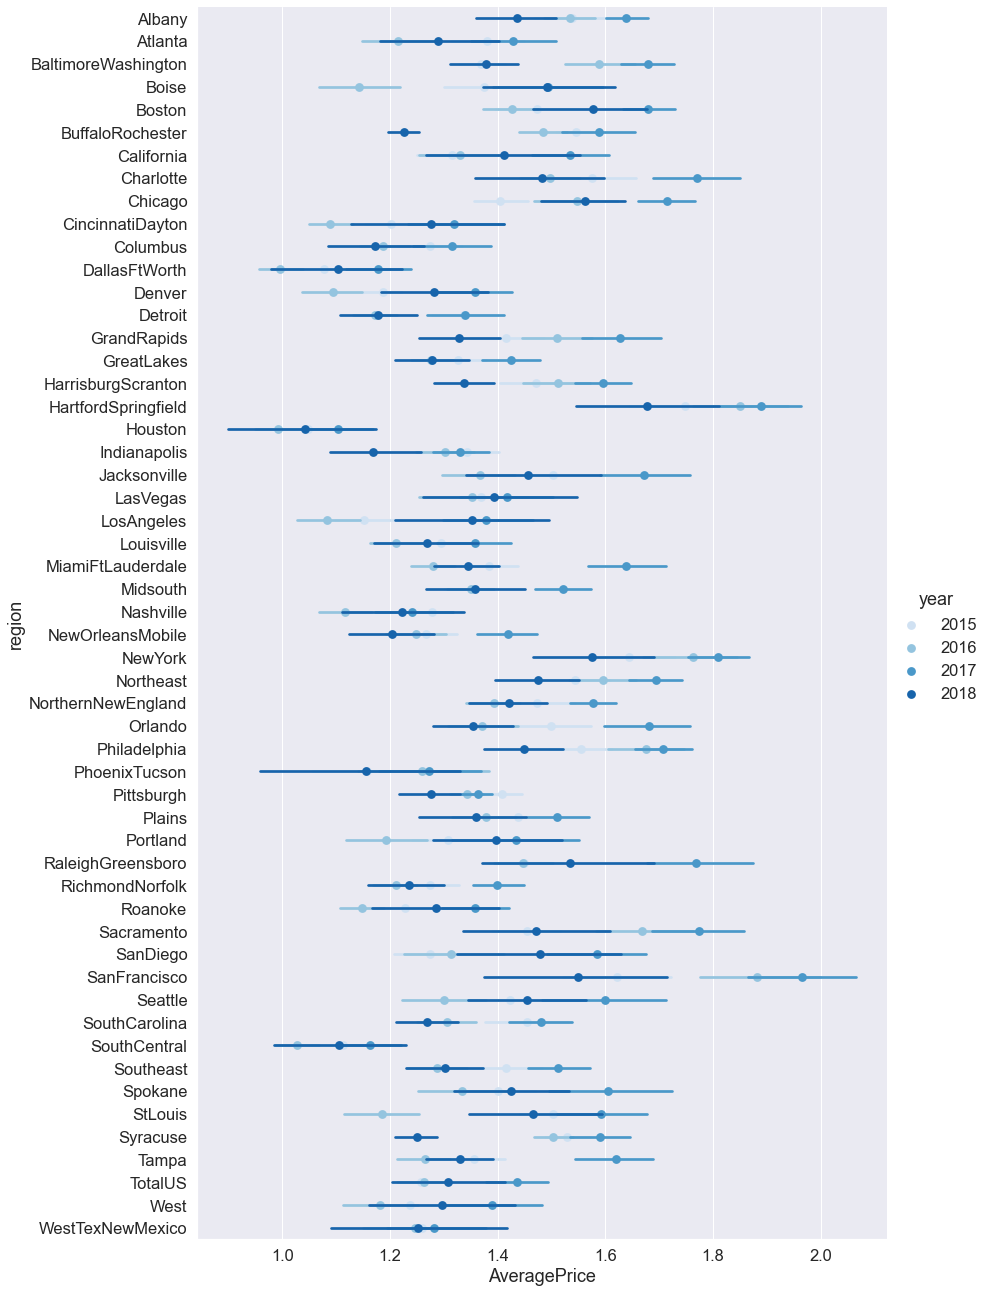

In [38]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

In [39]:
import datetime

In [40]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Year            0
Month           0
Day             0
dtype: int64

In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [42]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [45]:
def is_organic(type):
    if type == 'organic':
        return 1
    else:
        return 0

In [46]:
# extraction
df['organic'] = df['type'].apply(is_organic)
df = df.drop('type', axis=1)

In [48]:
# extraction
df = pd.concat([df, pd.get_dummies(df['region'])], axis=1)
df = df.drop('region', axis=1)

In [49]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,0,0,0,0,0,0,0,0,0,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,0,0,0,0,0,0,0,0,0,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,0,0,0,0,0,0,0,0,0,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,0,0,0,0,0,0,0,0,0,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x = df.drop('AveragePrice',axis=1)
y = df['AveragePrice']

# scaling
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

ValueError: could not convert string to float: 'December'

In [53]:
df = df.drop('Date', axis=1)